## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [3]:
# === IMPORT LIBRARY ===

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Setting tampilan pandas

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
# === LOAD DATA ===

file_path = 'titanic.xlsx'
df = pd.read_excel(file_path)

# Analisis Data

In [6]:
# === INVESTIGASI AWAL DATA ===
print("=== Head ===")
print(df.head())

=== Head ===
   survived                                             name     sex      age
0         1                    Allen, Miss. Elisabeth Walton  female  29.0000
1         1                   Allison, Master. Hudson Trevor    male   0.9167
2         0                     Allison, Miss. Helen Loraine  female   2.0000
3         0             Allison, Mr. Hudson Joshua Creighton    male  30.0000
4         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000


In [7]:
print("\n=== Tail ===")
print(df.tail())


=== Tail ===
     survived                                     name     sex   age
495         1  Mallet, Mrs. Albert (Antoinette Magnin)  female  24.0
496         0        Mangiavacchi, Mr. Serafino Emilio    male   NaN
497         0               Matthews, Mr. William John    male  30.0
498         0                Maybery, Mr. Frank Hubert    male  40.0
499         0                McCrae, Mr. Arthur Gordon    male  32.0


In [8]:
print("\n=== Sample ===")
print(df.sample(5, random_state=42))


=== Sample ===
     survived                                               name     sex   age
361         1                       Caldwell, Mr. Albert Francis    male  26.0
73          1                               Cleaver, Miss. Alice  female  22.0
374         1        Clarke, Mrs. Charles V (Ada Maria Winfield)  female  28.0
155         1  Hays, Mrs. Charles Melville (Clara Jennings Gr...  female  52.0
104         1                     Eustis, Miss. Elizabeth Mussey  female  54.0


In [9]:
print("\n=== Info ===")
df.info()


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [10]:
# === STATISTICAL SUMMARY ===
print("\n=== Statistical Summary ===")
print(df.describe(include='all'))


=== Statistical Summary ===
          survived                            name   sex         age
count   500.000000                             500   500  451.000000
unique         NaN                             499     2         NaN
top            NaN  Eustis, Miss. Elizabeth Mussey  male         NaN
freq           NaN                               2   288         NaN
mean      0.540000                             NaN   NaN   35.917775
std       0.498897                             NaN   NaN   14.766454
min       0.000000                             NaN   NaN    0.666700
25%       0.000000                             NaN   NaN   24.000000
50%       1.000000                             NaN   NaN   35.000000
75%       1.000000                             NaN   NaN   47.000000
max       1.000000                             NaN   NaN   80.000000


In [11]:
# === CEK DUPLIKAT ===
duplikat = df.duplicated().sum()
print(f"\nJumlah duplikat: {duplikat}")


Jumlah duplikat: 1


In [12]:
# Hapus duplikat jika ada
df = df.drop_duplicates()

In [13]:
# === CEK MISSING VALUES ===
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

In [14]:
print("\n=== Missing Values ===")
print(missing)
print("\n=== Persentase Missing ===")
print(missing_percent)


=== Missing Values ===
survived     0
name         0
sex          0
age         49
dtype: int64

=== Persentase Missing ===
survived    0.000000
name        0.000000
sex         0.000000
age         9.819639
dtype: float64


In [15]:
# Tangani missing value pada kolom 'age' dengan mean
df['age'] = df['age'].fillna(df['age'].mean())

# Plot

In [16]:
# === VISUALISASI ===
sns.set(style="whitegrid")

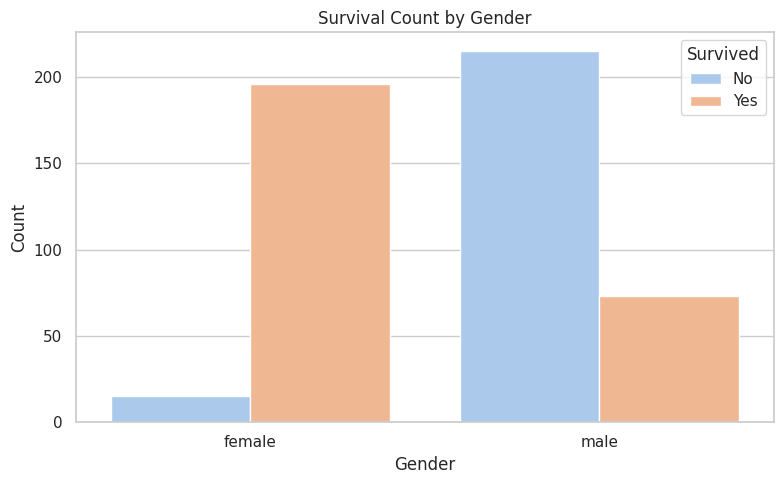

In [17]:
# Plot 1: Survival Count by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

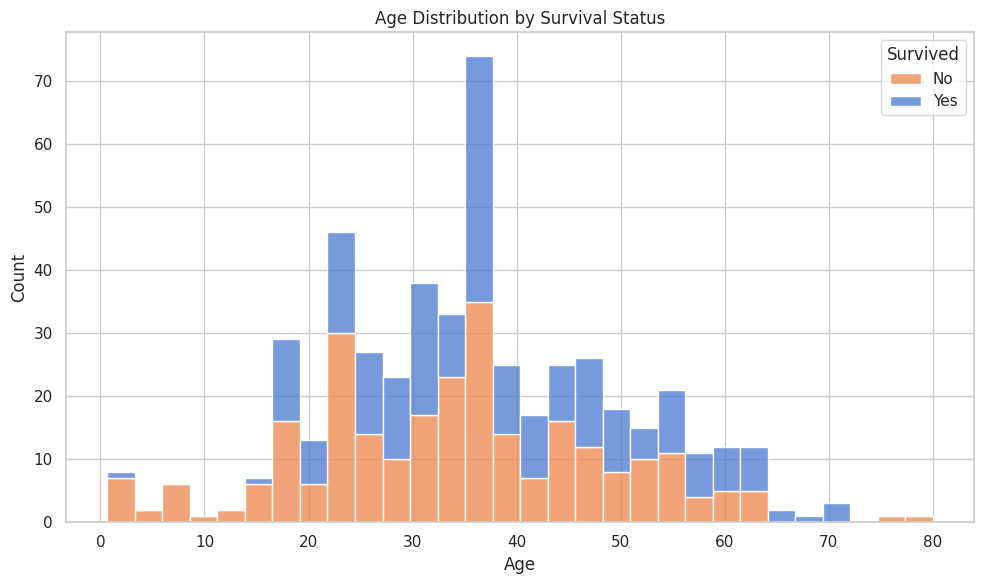

In [18]:
# Plot 2: Age Distribution by Survival Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=30, palette='muted')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

<ipython-input-19-250e5abeeac9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='survived', y='age', palette='Set2')


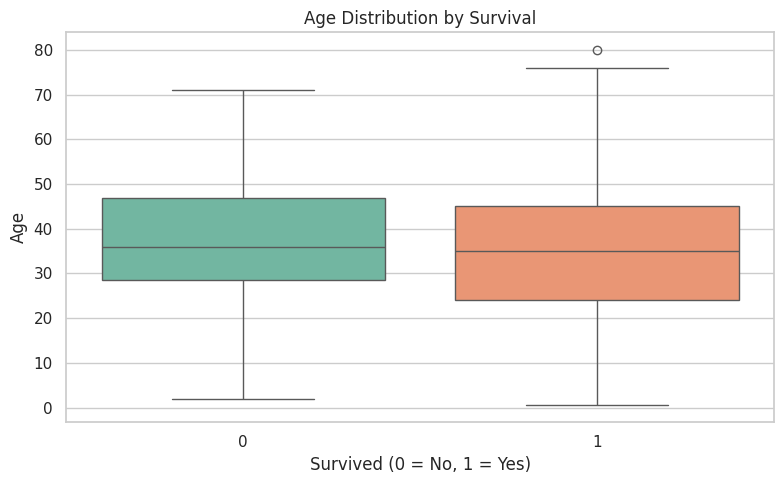

In [19]:
# Plot 3: Boxplot Age vs Survival
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='survived', y='age', palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

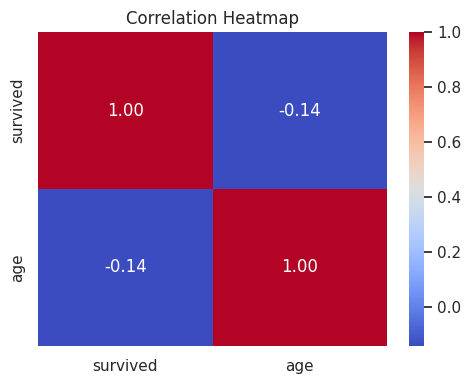

In [20]:
# Plot 4: Heatmap Korelasi
plt.figure(figsize=(5, 4))
sns.heatmap(df[['survived', 'age']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [21]:
# Plot 5: Pie Chart Survival Rate
survived_counts = df['survived'].value_counts()
labels = ['Did Not Survive', 'Survived']
colors = ['lightcoral', 'lightgreen']

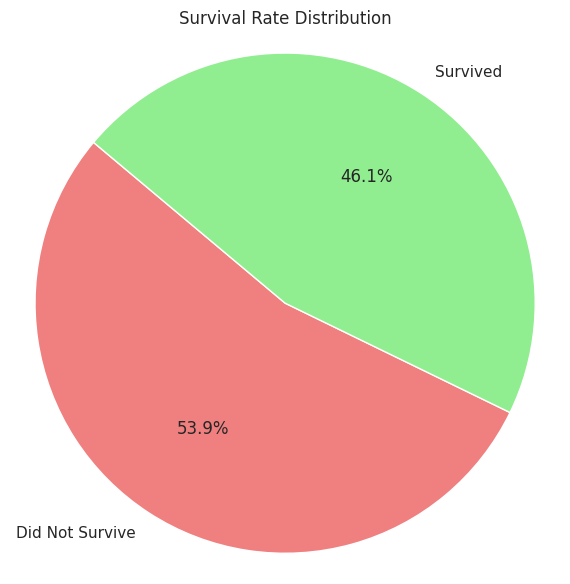

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Survival Rate Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Lanj: Membuat Model Prediksi 1

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [25]:
# Encode kolom 'sex'
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # female=0, male=1

In [27]:
# Pilih fitur dan target
X = df[['sex', 'age']]
y = df['survived']

In [28]:
# Drop NaN dari X dan sesuaikan y
X = X.dropna()
y = y[X.index]

In [29]:
# Split data ke train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# === TRAINING MODEL ===
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# === EVALUASI ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [32]:
# Print hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Akurasi: 0.8400

Confusion Matrix:
[[37  2]
 [14 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        39
           1       0.96      0.77      0.85        61

    accuracy                           0.84       100
   macro avg       0.84      0.86      0.84       100
weighted avg       0.87      0.84      0.84       100



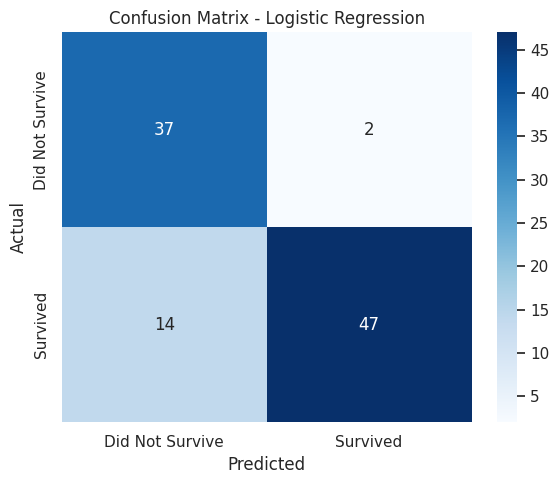

In [33]:
# === VISUALISASI CONFUSION MATRIX ===
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

# Lanj: Membuat Model Prediksi 2

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Buat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Prediksi
rf_pred = rf_model.predict(X_test)

In [37]:
# Evaluasi
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

In [38]:
print(f"Akurasi Random Forest: {rf_accuracy:.4f}")
print("\nConfusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(rf_report)

Akurasi Random Forest: 0.8300

Confusion Matrix:
[[33  6]
 [11 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.89      0.82      0.85        61

    accuracy                           0.83       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.84      0.83      0.83       100



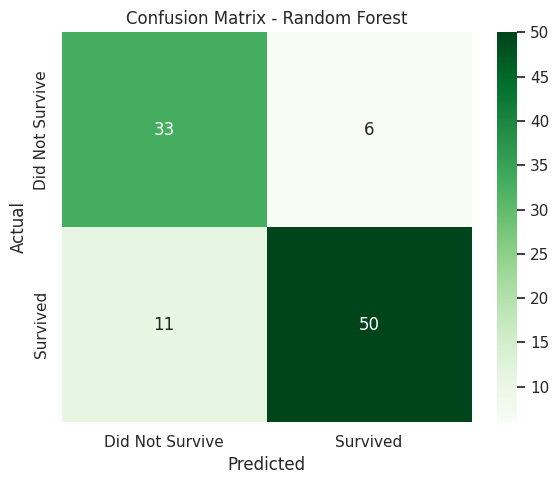

In [39]:
# Visualisasi Confusion Matrix Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# Lanj: Membandingkan akurasi Logistic vs Random Forest

In [40]:
# === PERBANDINGAN AKURASI DALAM PLOT ===
model_names = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy, rf_accuracy]

<ipython-input-41-142352a9528d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Set2')


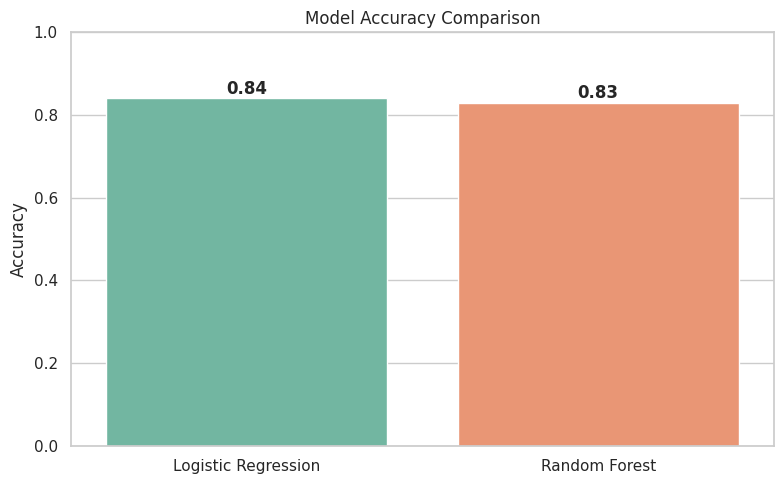

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='Set2')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()